# Projeção de dados alguns dados não sei ainda

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nbformat
import statsmodels.api as sm
from multidata import *

In [63]:
def errordiff(result_a, result_b):
    errors = []
    columns_a, columns_b = result_a.columns.values, result_b.columns.values
    size_a, size_b = len(columns_a), len(columns_b)
    for i in range(int(size_a/2), size_a):
        if columns_a[i] in columns_b:
            error_a = sm.tools.eval_measures.mse(result_a[columns_a[i]], result_a[columns_a[i] + ' projetado'], axis=0)
            error_b = sm.tools.eval_measures.mse(result_b[columns_a[i]], result_b[columns_a[i] + ' projetado'], axis=0)
            errors.append([columns_a[i], error_a, error_b, error_a/error_b])
    return errors

In [64]:
%run ../Limpezas/limpeza_análise_energética.ipynb

In [65]:
df = MultiData(dict_analise_energetica)

In [66]:
print(df[0].columns.values)

['NÃO RENOVÁVEL' 'PETRÓLEO' 'GÁS NATURAL' 'CARVÃO VAPOR'
 'CARVÃO METALÚRGICO' 'URÂNIO (U3O8)' 'OUTRAS NÃO RENOVÁVEIS' 'RENOVÁVEL'
 'ENERGIA HIDRÁULICA' 'LENHA' 'PRODUTOS DA CANA' 'EÓLICA' 'SOLAR¹'
 'OUTRAS RENOVÁVEIS']


## Vector Auto Regression (VAR)

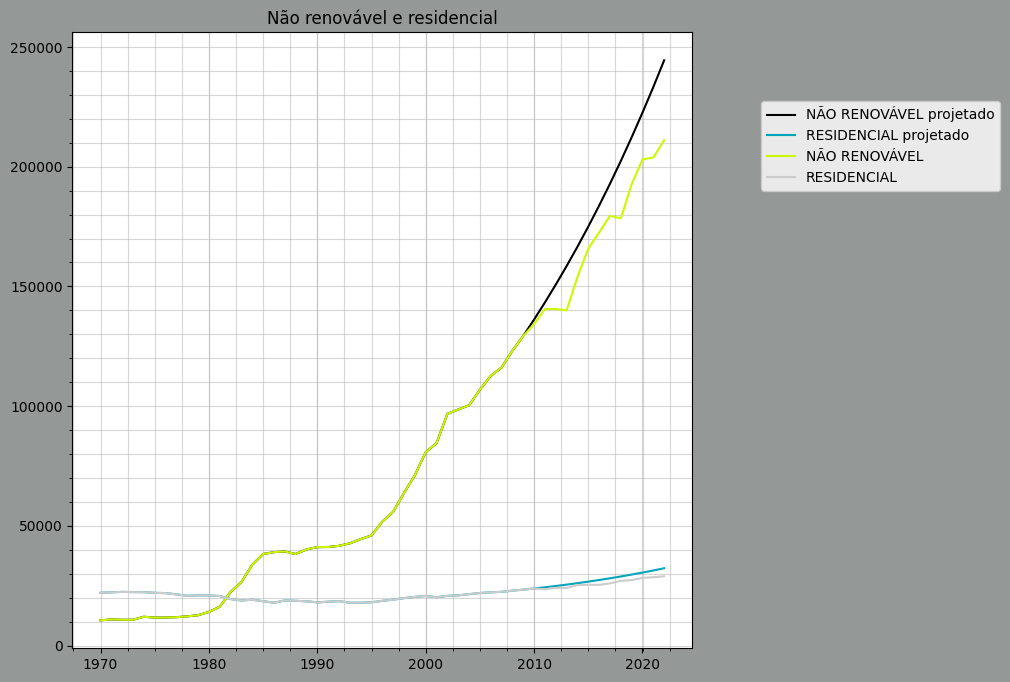

In [67]:
resultado1 = df.projection_var(40, [(0, 'NÃO RENOVÁVEL'), ('Consumo_Final_por_Setor', 'RESIDENCIAL')], 'Não renovável e residencial')

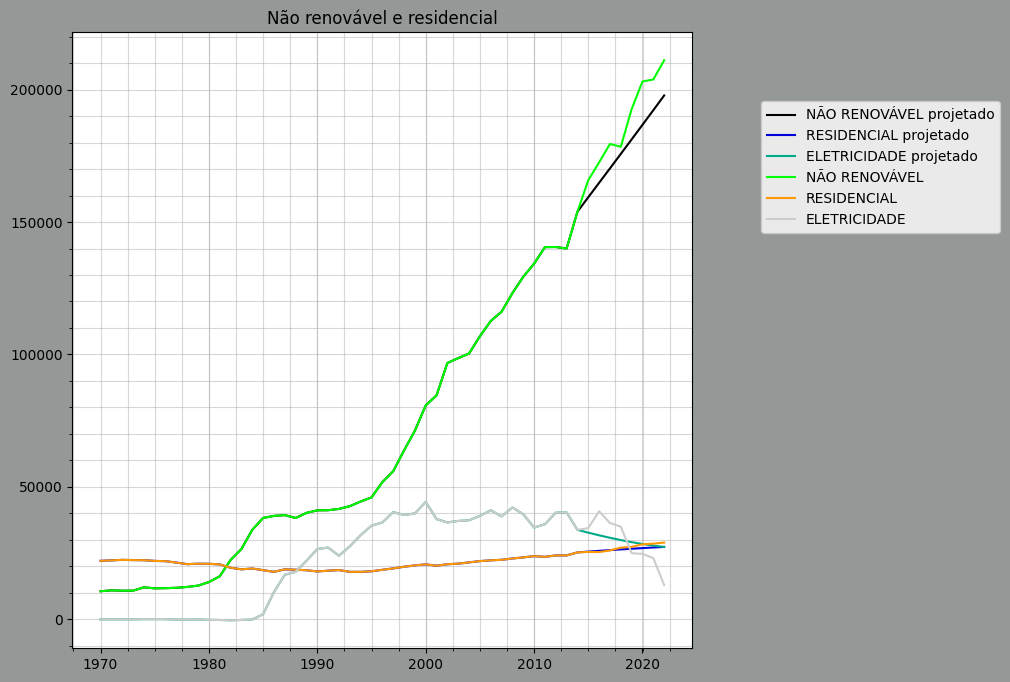

In [68]:
resultado2 = df.projection_var(45, [(0, 'NÃO RENOVÁVEL'), ('Consumo_Final_por_Setor', 'RESIDENCIAL'), ('Dependência_Externa_de_Energia', 'ELETRICIDADE')], 'Não renovável e residencial')

## Comparando VAR com duas variáveis com VAR com mais variáveis

In [69]:
errordiff(resultado1, resultado2)

[['NÃO RENOVÁVEL', 81668490.0060963, 17030133.14940388, 4.795528566313941],
 ['RESIDENCIAL', 881492.9867567859, 150951.92580292883, 5.839561052752616]]

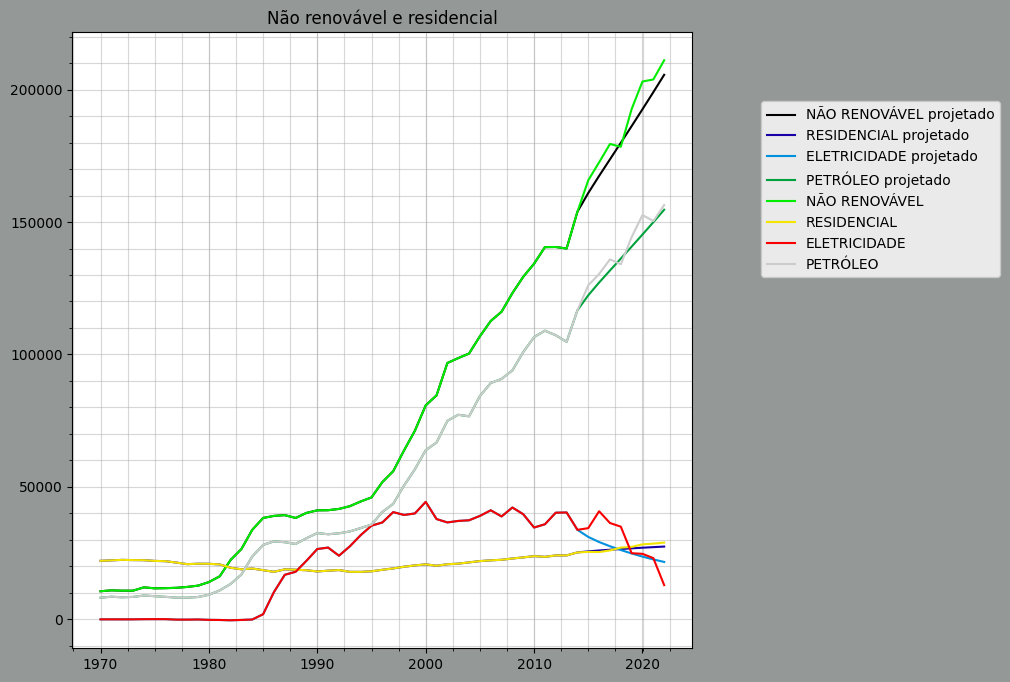

In [70]:
resultado3 = df.projection_var(45, [(0, 'NÃO RENOVÁVEL'),
                                    ('Consumo_Final_por_Setor', 'RESIDENCIAL'),
                                    ('Dependência_Externa_de_Energia', 'ELETRICIDADE'),
                                    (0, 'PETRÓLEO')],
                                    'Não renovável e residencial')

In [71]:
errordiff(resultado2, resultado3)

[['NÃO RENOVÁVEL', 17030133.14940388, 5459634.493249948, 3.119280818241439],
 ['RESIDENCIAL', 150951.92580292883, 126232.27645198579, 1.1958266938198292],
 ['ELETRICIDADE', 7617695.02991763, 7142973.473227722, 1.0664599355533368]]